In [3]:
from dis import show_code

import polars as pl
import polars.selectors as cs

import altair as alt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import hvplot.polars
import holoviews as hv
from bokeh.palettes import Category10

import datetime as dt

from markdown.extensions.smarty import decadeAbbrRe

In [4]:
df_movies_path = r"F:\Datasets\CSV datasets\movies\movies.csv"
df_movies_reviews_path = r"F:\Datasets\CSV datasets\movies\movies_reviews.csv"

In [5]:
df_movies = pl.read_csv(df_movies_path)
df_reviews = pl.read_csv(df_movies_reviews_path)

In [6]:
df_joined = df_movies.join(
    df_reviews,
    on="id",
    how="inner",
    suffix="_suffix",
)

In [7]:
drop_columns = [column for column in df_joined.columns if column.endswith("_suffix")]

df_joined = df_joined.select(cs.exclude(drop_columns))

In [8]:
df_joined.filter(
    pl.col('director').str.split(',').list.len() > 1
)

id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast,quote,score,date,author,publicationName,review_type
i64,str,str,str,str,str,i64,str,f64,i64,str,f64,f64,str,str,str,str,str,str,i64,str,str,str,str
2000547319,"""Singin' in the Rain""","""1952-04-11""","""Passed""","""Comedy,Musical,Romance""","""A silent film production compa…",103,"""Singin' Swingin' Glorious Feel…",99.0,17,"""Universal acclaim""",87.0,313.0,"""Universal acclaim""","""Loew's,Metro-Goldwyn-Mayer (MG…","""Stanley Donen,Gene Kelly""","""Betty Comden,Adolph Green""","""Gene Kelly,Donald O'Connor,Deb…","""such a joyous and entertaining…",100,"""2018-02-18""","""back_in_1939""",null,"""user"""
2000547319,"""Singin' in the Rain""","""1952-04-11""","""Passed""","""Comedy,Musical,Romance""","""A silent film production compa…",103,"""Singin' Swingin' Glorious Feel…",99.0,17,"""Universal acclaim""",87.0,313.0,"""Universal acclaim""","""Loew's,Metro-Goldwyn-Mayer (MG…","""Stanley Donen,Gene Kelly""","""Betty Comden,Adolph Green""","""Gene Kelly,Donald O'Connor,Deb…","""You will never find more joy a…",100,"""2020-05-05""","""Dostoyevsky3""",null,"""user"""
2000547319,"""Singin' in the Rain""","""1952-04-11""","""Passed""","""Comedy,Musical,Romance""","""A silent film production compa…",103,"""Singin' Swingin' Glorious Feel…",99.0,17,"""Universal acclaim""",87.0,313.0,"""Universal acclaim""","""Loew's,Metro-Goldwyn-Mayer (MG…","""Stanley Donen,Gene Kelly""","""Betty Comden,Adolph Green""","""Gene Kelly,Donald O'Connor,Deb…","""Perhaps the best Golden Age of…",100,"""2020-12-25""","""Mglovesfun""",null,"""user"""
2000547319,"""Singin' in the Rain""","""1952-04-11""","""Passed""","""Comedy,Musical,Romance""","""A silent film production compa…",103,"""Singin' Swingin' Glorious Feel…",99.0,17,"""Universal acclaim""",87.0,313.0,"""Universal acclaim""","""Loew's,Metro-Goldwyn-Mayer (MG…","""Stanley Donen,Gene Kelly""","""Betty Comden,Adolph Green""","""Gene Kelly,Donald O'Connor,Deb…","""Super entertaining classic. Ho…",100,"""2019-10-05""","""CodyZamboni""",null,"""user"""
2000547319,"""Singin' in the Rain""","""1952-04-11""","""Passed""","""Comedy,Musical,Romance""","""A silent film production compa…",103,"""Singin' Swingin' Glorious Feel…",99.0,17,"""Universal acclaim""",87.0,313.0,"""Universal acclaim""","""Loew's,Metro-Goldwyn-Mayer (MG…","""Stanley Donen,Gene Kelly""","""Betty Comden,Adolph Green""","""Gene Kelly,Donald O'Connor,Deb…","""Glorious Performance **** far …",100,"""2019-08-29""","""TootsieWootsy""",null,"""user"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2000549063,"""Death of a Nation""","""2018-08-03""","""PG-13""","""Documentary,History""","""Not since 1860 have the Democr…",108,"""Can we save America a second t…",1.0,8,"""Overwhelming dislike""",44.0,297.0,"""Mixed or average""","""D'Souza Media,Pure Flix / Qual…","""Dinesh D'Souza,Bruce Schooley""","""Dinesh D'Souza,Bruce Schooley""","""Dinesh D'Souza,Victoria Chilap…","""D’Souza fails, as ever, to mak…",0,"""2018-07-30""","""Vadim Rizov""","""The A.V. Club""","""critic"""
2000549063,"""Death of a Nation""","""2018-08-03""","""PG-13""","""Documentary,History""","""Not since 1860 have the Democr…",108,"""Can we save America a second t…",1.0,8,"""Overwhelming dislike""",44.0,297.0,"""Mixed or average""","""D'Souza Media,Pure Flix / Qual…","""Dinesh D'Souza,Bruce Schooley""","""Dinesh D'Souza,Bruce Schooley""","""Dinesh D'Souza,Victoria Chilap…","""The meandering and insufferabl…",0,"""2018-07-30""","""David Ehrlich""","""IndieWire""","""critic"""
2000549063,"""Death of a Nation""","""2018-08-03""","""PG-13""","""Documentary,History""","""Not since 1860 have the Democr…",108,"""Can we save America a second t…",1.0,8,"""Overwhelming dislike""",44.0,297.0,"""Mixed or average""","""D'Souza Media,Pure Flix / Qual…","""Dinesh D'Souza,Bruce Schooley""","""Di

In [9]:
df_joined = df_joined.with_columns(
    pl.col('releaseDate').str.strptime(pl.Date, '%Y-%m-%d', strict=False),
    (pl.col('duration') * 60 * 1000).cast(pl.Duration('ms')),
    pl.col('metascore_count').cast(pl.UInt8),
    pl.col('date').str.strptime(pl.Date, '%Y-%m-%d', strict=False),
)

In [10]:
df_joined = df_joined.with_columns(
    pl.col('genres').str.split(',').alias('genres')
).explode('genres')

In [11]:
df_joined = df_joined.with_columns(
    pl.col('director').str.split(',')
).explode('director')

In [12]:
df_joined.group_by(
    'director'
).agg(
    pl.sum('duration').alias('duration'),
).sort(by='duration', descending=True)

director,duration
str,duration[ms]
"""Zack Snyder""",2977d 35m
"""Christopher Nolan""",2309d 19h 28m
"""Rian Johnson""",2224d 2h 17m
"""J.J. Abrams""",1989d 19h 35m
"""Ridley Scott""",1455d 36m
…,…
"""Yulie Cohen""",6h 46m
"""Martin Doblmeier""",6h 12m
"""Josh Pais""",1h 12m


In [13]:
df_joined

id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast,quote,score,date,author,publicationName,review_type
i64,str,date,str,str,str,duration[ms],str,f64,u8,str,f64,f64,str,str,str,str,str,str,i64,date,str,str,str
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""What a bitter pill to swallow …",100,2023-11-22,"""Siza""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""The best 10 hours you will spe…",100,2021-05-01,"""ItsMahdiyarr""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""Touching and human, Dekalog is…",100,2019-12-05,"""Andremax""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""Krzysztof Kieslowski's ""The De…",100,2018-04-26,"""thelol""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""For me it is simply breathtaki…",100,2024-10-31,"""Daki1105""",null,"""user"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2000538594,"""Boogie Woogie""",2010-04-23,"""R""","""Drama""","""A comedy of manners set agains…",1h 34m,"""Seduction. Betrayal. Death. Th…",null,11,null,46.0,10.0,"""Mixed or average""","""The Works International,Consta…","""Duncan Ward""","""Danny Moynihan""","""Gillian Anderson,Alan Cumming,…","""A stinging satire of the conte…",50,2010-10-25,"""gazpacho""",null,"""user"""
2000538594,"""Boogie Woogie""",2010-04-23,"""R""","""Comedy""","""A comedy of manners set agains…",1h 34m,"""Seduction. Betrayal. Death. Th…",null,11,null,46.0,10.0,"""Mixed or average""","""The Works International,Consta…","""Duncan Ward""","""Danny Moynihan""","""Gillian Anderson,Alan Cumming,…","""If you're looking for a reason…",30,2013-03-02,"""Taplinger""",null,"""user"""
2000538594,"""Boogie Woogie""",2010-04-23,"""R""","""Drama""","""A comedy of manners set agains…",1h 34m,"""Seduction. Betrayal. Death. Th…",null,11,null,46.0,10.0,"""Mixed or average""","""The Works International,Consta…","""Duncan Ward""","""Danny Moynihan""","""Gillian Anderson,Alan Cumming,…","""If you're looking for a reason…",30,2013-03-02,"""Taplinger""",null,"""user"""


In [14]:
df_joined.collect_schema()

Schema([('id', Int64),
        ('title', String),
        ('releaseDate', Date),
        ('rating', String),
        ('genres', String),
        ('description', String),
        ('duration', Duration(time_unit='ms')),
        ('tagline', String),
        ('metascore', Float64),
        ('metascore_count', UInt8),
        ('metascore_sentiment', String),
        ('userscore', Float64),
        ('userscore_count', Float64),
        ('userscore_sentiment', String),
        ('production_companies', String),
        ('director', String),
        ('writer', String),
        ('top_cast', String),
        ('quote', String),
        ('score', Int64),
        ('date', Date),
        ('author', String),
        ('publicationName', String),
        ('review_type', String)])

In [15]:
df_joined.head()

id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast,quote,score,date,author,publicationName,review_type
i64,str,date,str,str,str,duration[ms],str,f64,u8,str,f64,f64,str,str,str,str,str,str,i64,date,str,str,str
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""What a bitter pill to swallow …",100,2023-11-22,"""Siza""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""The best 10 hours you will spe…",100,2021-05-01,"""ItsMahdiyarr""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""Touching and human, Dekalog is…",100,2019-12-05,"""Andremax""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""Krzysztof Kieslowski's ""The De…",100,2018-04-26,"""thelol""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""For me it is simply breathtaki…",100,2024-10-31,"""Daki1105""",null,"""user"""


In [16]:
director_mean_metascore = df_joined.select(
    'director', 'metascore'
).group_by(
    'director'
).agg(
    pl.mean('metascore').round(2).alias('metascore'),
    pl.count('metascore').alias('num_reviews'),
).filter(
    pl.col('num_reviews') >= 3
).sort(by='metascore', descending=True).head(10)
director_mean_metascore

director,metascore,num_reviews
str,f64,u32
"""Jean Renoir""",99.0,44
"""D.W. Griffith""",99.0,36
"""Carl Theodor Dreyer""",98.0,72
"""Fritz Lang""",98.0,80
"""Julien Duvivier""",98.0,39
"""Robert Bresson""",98.0,32
"""T. Hee""",97.96,505
"""Norman Ferguson""",97.41,703
"""Ben Sharpsteen""",97.01,985


In [17]:
bar = alt.Chart(director_mean_metascore).mark_bar().encode(
    x='director',
    y='metascore',
    color=alt.Color('metascore', scale=alt.Scale(scheme='blues')),
    tooltip=['director', 'metascore', 'num_reviews']
).properties(
    width=alt.Step(55),
    height=300,
    title='Director Mean Metascore',
).interactive()

bar

alt.Chart(...)

In [18]:
top_10_genres = df_joined.group_by(
    'genres'
).agg(
    pl.count('genres').alias('count')
).sort(
    'count', descending=True
).head(10)

line_chart = alt.Chart(
    top_10_genres
).mark_line(
    point=True
).encode(
    x='genres',
    y='count',
    tooltip=['genres', alt.Tooltip('count', title='Count')]
).properties(
    width=800,
    height=550,
    title='Top 10 Genres',
).interactive()


line_chart

alt.Chart(...)

In [19]:
df_joined.collect_schema()

Schema([('id', Int64),
        ('title', String),
        ('releaseDate', Date),
        ('rating', String),
        ('genres', String),
        ('description', String),
        ('duration', Duration(time_unit='ms')),
        ('tagline', String),
        ('metascore', Float64),
        ('metascore_count', UInt8),
        ('metascore_sentiment', String),
        ('userscore', Float64),
        ('userscore_count', Float64),
        ('userscore_sentiment', String),
        ('production_companies', String),
        ('director', String),
        ('writer', String),
        ('top_cast', String),
        ('quote', String),
        ('score', Int64),
        ('date', Date),
        ('author', String),
        ('publicationName', String),
        ('review_type', String)])

In [20]:
df_joined

id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast,quote,score,date,author,publicationName,review_type
i64,str,date,str,str,str,duration[ms],str,f64,u8,str,f64,f64,str,str,str,str,str,str,i64,date,str,str,str
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""What a bitter pill to swallow …",100,2023-11-22,"""Siza""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""The best 10 hours you will spe…",100,2021-05-01,"""ItsMahdiyarr""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""Touching and human, Dekalog is…",100,2019-12-05,"""Andremax""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""Krzysztof Kieslowski's ""The De…",100,2018-04-26,"""thelol""",null,"""user"""
2000545497,"""Dekalog (1988)""",1996-03-22,"""TV-MA""","""Drama""","""This masterwork by Krzysztof K…",9h 32m,null,100.0,13,"""Universal acclaim""",78.0,162.0,"""Generally favorable""","""Telewizja Polska (TVP),Zespol …","""Krzysztof Kieslowski""","""Krzysztof Kieslowski,Krzysztof…","""Artur Barcis,Olgierd Lukaszewi…","""For me it is simply breathtaki…",100,2024-10-31,"""Daki1105""",null,"""user"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2000538594,"""Boogie Woogie""",2010-04-23,"""R""","""Drama""","""A comedy of manners set agains…",1h 34m,"""Seduction. Betrayal. Death. Th…",null,11,null,46.0,10.0,"""Mixed or average""","""The Works International,Consta…","""Duncan Ward""","""Danny Moynihan""","""Gillian Anderson,Alan Cumming,…","""A stinging satire of the conte…",50,2010-10-25,"""gazpacho""",null,"""user"""
2000538594,"""Boogie Woogie""",2010-04-23,"""R""","""Comedy""","""A comedy of manners set agains…",1h 34m,"""Seduction. Betrayal. Death. Th…",null,11,null,46.0,10.0,"""Mixed or average""","""The Works International,Consta…","""Duncan Ward""","""Danny Moynihan""","""Gillian Anderson,Alan Cumming,…","""If you're looking for a reason…",30,2013-03-02,"""Taplinger""",null,"""user"""
2000538594,"""Boogie Woogie""",2010-04-23,"""R""","""Drama""","""A comedy of manners set agains…",1h 34m,"""Seduction. Betrayal. Death. Th…",null,11,null,46.0,10.0,"""Mixed or average""","""The Works International,Consta…","""Duncan Ward""","""Danny Moynihan""","""Gillian Anderson,Alan Cumming,…","""If you're looking for a reason…",30,2013-03-02,"""Taplinger""",null,"""user"""


In [21]:
ratings = df_joined.select(
    pl.col('rating')
).group_by(
    'rating'
).len().filter(
    pl.col('rating').is_not_null()
)

base = alt.Chart(ratings).mark_arc(outerRadius=400).encode(
    theta=alt.Theta(field='len', type="quantitative", stack=True),
    color=alt.Color(field='rating', type="nominal"),
    tooltip=['rating', alt.Tooltip('len', title='Count')]
)

text = alt.Chart(ratings).mark_text(radius=435).encode(
    text=alt.Text(field='rating', type='nominal'),
    theta=alt.Theta(field='len', type='quantitative', stack=True),
    order=alt.Order(field='len', sort='descending'),
    color=alt.value("black")
)

pie_with_labels = base + text

pie_with_labels = pie_with_labels.properties(
    width=900,
    height=700,
    title="Genre Distribution"
).configure_view(
    strokeWidth=0
)

pie_with_labels

alt.LayerChart(...)

In [22]:
df_joined.collect_schema()

Schema([('id', Int64),
        ('title', String),
        ('releaseDate', Date),
        ('rating', String),
        ('genres', String),
        ('description', String),
        ('duration', Duration(time_unit='ms')),
        ('tagline', String),
        ('metascore', Float64),
        ('metascore_count', UInt8),
        ('metascore_sentiment', String),
        ('userscore', Float64),
        ('userscore_count', Float64),
        ('userscore_sentiment', String),
        ('production_companies', String),
        ('director', String),
        ('writer', String),
        ('top_cast', String),
        ('quote', String),
        ('score', Int64),
        ('date', Date),
        ('author', String),
        ('publicationName', String),
        ('review_type', String)])

C:\Users\Zygim\anaconda3\envs\Polars_3_12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


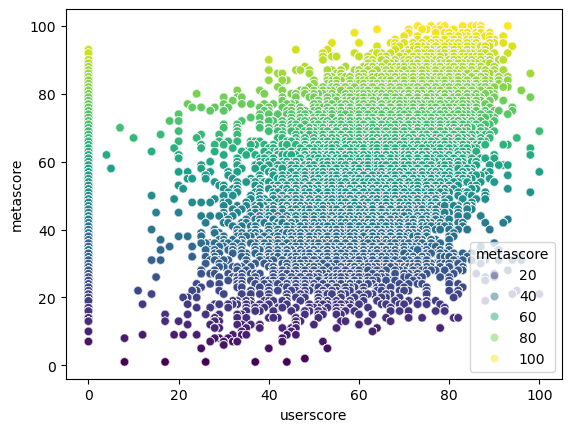

In [25]:
sns.scatterplot(
    data=df_joined.to_pandas(),
    x='userscore',
    y='metascore',
    hue='metascore',
    palette='viridis',
    alpha=0.5
)

plt.show()

In [45]:
df_joined = df_joined.with_columns(
    ((pl.col('releaseDate').dt.year() // 10) * 10).alias('decade'),
)

In [53]:
decade_duration = df_joined.select(
    'decade', 'duration'
).group_by(
    pl.col('decade')
).agg(
    pl.sum('duration').alias('duration'),
).filter(
    pl.col('decade').is_not_null()
).sort(by='decade', descending=True)

<Axes: xlabel='decade', ylabel='duration'>

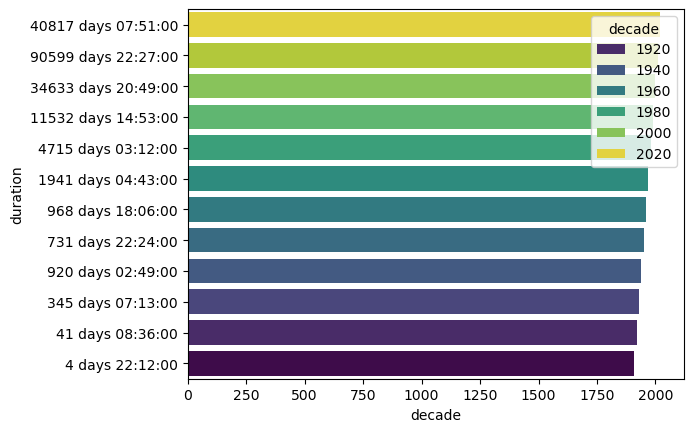

In [59]:
sns.barplot(
    data=decade_duration.to_pandas(),
    x='decade',
    y='duration',
    hue='decade',
    palette='viridis'
)

In [67]:
df_joined.select(
    'production_companies', 'metascore'
).group_by(
    'production_companies'
).agg(
    pl.mean('metascore').round(2).alias('metascore'),
).filter(
    pl.col('metascore').is_not_null()
).sort(
    by='metascore', descending=True
).head(20)

production_companies,metascore
str,f64
"""MK2 Productions,France 3 Ciném…",100.0
"""Telewizja Polska (TVP),Zespol …",100.0
"""Alfred J. Hitchcock Production…",100.0
"""Shochiku,Entertain Me Producti…",100.0
"""Horizon Pictures (II),Columbia…",100.0
…,…
"""Universal International Pictur…",99.0
"""Charles Chaplin Productions,Un…",99.0
"""Walt Disney Animation Studios,…",99.0
